## **PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle**

## <center>**1. Введение**

***
✍ Вы прошли все необходимые модули разведывательного анализа данных — теперь пришло время переходить к настоящей практике! В этом проекте мы применим свои знания и навыки на реальной задаче. Готовы приступать?
***

**В РЕЗУЛЬТАТЕ РАБОТЫ НАД ДАННЫМ ПРОЕКТОМ ВЫ:**

✔️ создадите свою первую модель, основанную на алгоритмах машинного обучения;

✔️ примете участие в соревновании на *Kaggle*;

✔️ поймёте, как правильно «подготовить» данные, чтобы ваша модель работала лучше.

### <span style=color:green>**ЧЕМ МЫ БУДЕМ ЗАНИМАТЬСЯ?**

В этом модуле вы попробуете решить свой первый настоящий кейс и создадите первую модель, использующую алгоритмы машинного обучения.

<span style=background:grey;color:white>→ Не пугайтесь, вам не придётся изучать машинное обучение в экстремально короткие сроки! На самом деле код для создания и обучения модели мы вам предоставим в готовом виде, и этот код будет довольно простым. Всему этому более подробно вы научитесь позже, в модулях по машинному обучению. Пока ваша задача будет состоять в том, чтобы качественно подготовить данные для обучения модели.

Скоро вы убедитесь не только в теории, но и на практике, что тщательная очистка данных, проектирование признаков и разведывательный анализ данных способны повысить точность модели в два и более раз, и владение этими навыками играет в машинном обучении не меньшую роль, чем умение выбрать алгоритм и настроить модель.

Итак, вы создадите свою первую модель, а после этого используете свои навыки для участия в соревновании на платформе [Kaggle](https://www.kaggle.com/).

### <span style=color:green>**КАКОЙ КЕЙС РЕШАЕМ?**

Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

## <center>**2. Разбираемся с данными**

***
✍ *В этом модуле мы будем работать с датасетом, в котором содержатся сведения о 515 000 отзывов на отели Европы. Модель, которую мы будем обучать, должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных. Изученные навыки разведывательного анализа помогут нам улучшить модель.*
***

Первоначальная версия датасета содержит 17 полей со следующей информацией:

* *hotel_address* — адрес отеля;
* *review_date* — дата, когда рецензент разместил соответствующий отзыв;
* *average_score* — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* *hotel_name* — название отеля;
* *reviewer_nationality* — страна рецензента;
* *negative_review* — отрицательный отзыв, который рецензент дал отелю;
* *review_total_negative_word_counts* — общее количество слов в отрицательном отзыв;
* *positive_review* — положительный отзыв, который рецензент дал отелю;
* *review_total_positive_word_counts* — общее количество слов в положительном отзыве.
* *reviewer_score* — оценка, которую рецензент поставил отелю на основе своего опыта;
* *total_number_of_reviews_reviewer_has_given* — количество отзывов, которые рецензенты дали в прошлом;
* *total_number_of_reviews* — общее количество действительных отзывов об отеле;
* *tags* — теги, которые рецензент дал отелю;
* *days_since_review* — количество дней между датой проверки и датой очистки;
* *additional_number_of_scoring* — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* *lat* — географическая широта отеля;
* *lng* — географическая долгота отеля.

In [201]:
# Essential DS libraries
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

# Additional libraries
# from pandas_profiling import ProfileReport
# import matplotlib.pyplot as plt
# import seaborn as sns
# import category_encoders as ce

In [217]:
import pandas as pd

hotels = pd.read_csv('hotels.csv')
hotels.head()

hotels_hw = hotels.copy() 

<span style=color:blue>**Задание 2.1**

<span style=color:blue>В каких столбцах данные содержат пропущенные значения?
<span style=color:blue>Отметьте все подходящие варианты ответов.

In [203]:
hotels_cols_null_percent = hotels.isnull().mean() * 100
hotels_cols_with_null = hotels_cols_null_percent[hotels_cols_null_percent > 0].sort_values(ascending=False)
print(f"Cтолбцы, данные которых содержат пропущенные значения: \n{hotels_cols_with_null}")

Cтолбцы, данные которых содержат пропущенные значения: 
lat    0.63288
lng    0.63288
dtype: float64


<span style=color:blue>**Задание 2.2**

<span style=color:blue>В каких столбцах данные хранятся в числовом формате?

In [204]:
# hotels.info()
hotels.select_dtypes(['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         384355 non-null  float64
 8   lng                                         384355 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


<span style=color:blue>**Задание 2.3**

<span style=color:blue>В каких столбцах данные представляют собой строки?

In [205]:
hotels.select_dtypes(['object']).info()
# hotels.select_dtypes(['object']).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel_address         386803 non-null  object
 1   review_date           386803 non-null  object
 2   hotel_name            386803 non-null  object
 3   reviewer_nationality  386803 non-null  object
 4   negative_review       386803 non-null  object
 5   positive_review       386803 non-null  object
 6   tags                  386803 non-null  object
 7   days_since_review     386803 non-null  object
dtypes: object(8)
memory usage: 23.6+ MB


<span style=color:blue>**Задание 2.4**

<span style=color:blue>Напишите признак, представляющий собой дату.

* review_date

## <center>**3. Машинное обучение для самых маленьких**

***

✍ Что нужно сделать в этом юните?

**Создать свою первую модель, основанную на алгоритмах машинного обучения.**

Код для создания модели мы предоставим, но чтобы модель заработала, в неё нужно передать правильные данные. **Приведение данных в нужный вид и будет вашей задачей в этом юните.**

Однако прежде мы рассмотрим основные шаги, которые нужно проделать с данными от загрузки до получения результатов модели.
***

<span style=color:blue>**Задание 3.2**

<span style=color:blue>На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типов object и string и заполним пропущенные значения каким-то одним значением (unknown, нулём или средним арифметическим) для всего столбца.

<span style=color:blue>После выполнения всех преобразований попробуйте заново запустить код уже с очищенными данными.

<span style=color:blue>Какое значение метрики MAPE вам удалось получить на этом этапе?

In [206]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']

# hotels_benchmark = hotels.copy()
# hotels_benchmark.drop(object_columns, axis = 1, inplace=True)

# заполняем пропуски самым простым способом
# hotels_benchmark = hotels.fillna(0)

In [207]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']


hotels.drop(object_columns, axis = 1, inplace=True)

# заполняем пропуски самым простым способом
hotels = hotels.fillna(0)

<span style=color:blue>MAPE: 0.14136578777324713

1. **РАЗДЕЛЕНИЕ НАБОРА ДАННЫХ**

![img](dst3-u2-pr3_3_1.png)

Далее каждый из полученных наборов мы делим на **тренировочный** (*train*, используется для обучения модели) и **тестовый** (*test*, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода *train_test_split()* библиотеки *sklearn*. В параметрах метода (параметр *test_size*) мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25 %, или 0.25.

<span style=background:green;color:white>Не существует идеального соотношения обучающей и тестовой выборки, однако принято выделять на часть обучения больше данных, около ⅔, а оставшуюся часть используют для проверки — ⅓ выборки. Таким образом, самые популярные значения параметра *test_size* составляют 0.3, 0.25, 0.2.

In [208]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']  
      
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

2. **СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ**

Сам процесс создания и тестирования модели занимает всего четыре строчки кода. В качестве алгоритма мы будем использовать популярный и довольно мощный алгоритм *RandomForestRegressor*. Он реализован в библиотеке **sklearn**.

In [209]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

3. **ОЦЕНКА КАЧЕСТВА МОДЕЛИ**

Для оценки качества модели — точности прогнозов, сделанных моделью, — мы будем использовать метрику (некий числовой показатель), которая называется **MAPE (mean absolute percentage error)**, средняя абсолютная процентная ошибка. Эту метрику очень легко интерпретировать. Если у вас *MAPE* = 11.4 %, то это говорит о том, что ошибка составила 11.4 % от фактических значений.

$MAPE = 100 \%$ $* \: 1/n\sum^{n}_{i=1} \frac{|ytrue_{i} - ypred_{i}|}{|ytrue_{i}|}$

где $ytrue_{i}$ — фактические значения прогноза, a $ypred_{i}$ — предсказанные.

Для расчета MAPE сравним предсказанные нашей моделью значения с реальными и посмотрим на значение ошибки.

In [210]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14142427254046686


<span style=color:blue>**Задание 3.1**

<span style=color:blue>Вопрос для размышления. По какой причине во время обучения модели возникла ошибка?

* Модель не может работать с параметрами по умолчанию. Параметры нужно настраивать вручную, а мы этого не делали.
* Проблема в названиях столбцов: они слишком длинные, и там используются не только буквы, но и знаки подчёркивания.
* **Ошибка возникла при обработке столбца со строковыми значениями. Следовательно, для обучения модели все данные должны быть переданы только в числовом формате.(TRUE)**

Итак, мы выяснили, что для корректной работы все данные в датафрейме, который вы будете использовать при обучении модели, должны быть в числовых форматах *int* или *float*. 

<span style=background:red;color:white>Есть ещё одно ограничение: в столбцах не должно быть пропущенных значений. Вместо каждого пропущенного значения вам нужно будет вычислить и поместить в ячейку максимально близкое к реальности значение.

*→ Таким образом, чтобы код, отвечающий за обучение модели, заработал, мы должны использовать в нём датафрейм, содержащий только количественные признаки и не содержащий пропущенных значений.*

На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типов *object* и *string* и заполним пропущенные значения каким-то одним значением (*unknown*, *нулём* или *средним арифметическим*) для всего столбца.

Для выполнения этих операций вам понадобятся следующие методы библиотеки Pandas:

* *[drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)* — метод для удаления ненужных строк и столбцов (**обратите внимание**, что в материалах данного модуля этот метод разрешается использовать только для удаления столбцов);
* *[fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)* — метод для заполнения пропущенных значений в столбце или во всём датафрейме.

После выполнения всех преобразований попробуйте заново запустить код уже с очищенными данными.

<span style=background:blue;color:white>См. решение Задания 3.2. выше

<span style=background:grey;color:white>Говорят, одному эксперту удалось так провести обработку данных, что модель отработала с точностью MAPE = 0.10. Как приблизиться к этому результату и по возможности улучшить его? Об этом вы узнаете на следующем шаге →

## <center>**4. Лучший способ добиться успеха — следовать советам**

***
✍ Что делать дальше?

**Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных.**

При подготовке датасета необходимо будет вспомнить все шаги, которые мы проделывали в модулях *EDA*. Нам нужно будет не только избавиться от пропущенных значений и нечисловых признаков, но и спроектировать новые признаки на основе информации, уже содержащейся в данных, или используя внешние источники данных, если это возможно. Также мы закодируем и преобразуем признаки, а после отберём лучшие из них.
***

Задачу, которая стоит перед вами, можно свести к пяти пунктам:

* **Удаление строковых значений.** Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.
* **Очистка от пропущенных значений.** На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.
* **Создание новых признаков.** Мы попробуем создать новые столбцы с данными из существующих данных или с использованием внешних источников.
* **Преобразование признаков.** Применим различные преобразования над признаками вроде нормализации, стандартизации.
* **Отбор признаков.** Используем анализ мультиколлинеарности как шаг отбора признаков для модели.


**Ваша задача** — при помощи этих шагов и рекомендаций повысить качество предсказания. Чтобы понять, что качество улучшилось, ориентируйтесь на метрику MAPE: чем она меньше, тем лучше. Рассмотрим шаги подробнее.

**СТРОКОВЫЕ ДАННЫЕ**

В исходном наборе данных всего девять столбцов содержат числовые данные. Так что просто удалить все *object*-значения и считать задачу выполненной не получится. Мы сделали это в прошлом юните, чтобы получить значение метрики. Но чтобы улучшить качество модели, вам перед удалением придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

**ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ**

Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Используйте знания из модулей очистки данных или вспомните о мере центральной тенденции в юнитах статистики. Попробуйте различные способы и ориентируйтесь на итоговую метрику.

**НОВЫЕ ПРИЗНАКИ**

Это, пожалуй, самая творческая часть работы на данном шаге. Создание новых признаков потребует от вас способности вникать в контент, умения подключать к работе интуицию, творческого подхода и готовности к экспериментам. Попробуйте извлечь несколько признаков из даты, проанализируйте датасет на возможность добавления внешних источников данных. При наличии времени разберите текстовые столбцы на признаки.

**ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ**

Данные могут быть представлены в невыгодном для модели свете. Используйте изученные вами способы преобразования данных, чтобы сделать данные качественнее.

**ОТБОР ПРИЗНАКОВ**

Признаки могут дублировать информацию. **Анализ мультиколлинеарности** мы будем использовать, чтобы выбрать уникальные признаки для модели.

Также перед обучением (после разделения выборки на *X* и *y*) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.

***
Для оценки значимости категориальных признаков будем использовать тест **хи-квадрат**, для непрерывных признаков — тест **ANOVA**.
***

Для начала разделим признаки по типу, перечислим их:

In [211]:
hotels.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
0,581,8.4,3,1994,4,7,10.0,51.507894,-0.143671
1,299,8.3,3,1361,2,14,6.3,51.521009,-0.123097
2,32,8.9,6,406,0,14,7.5,48.845377,2.325643
3,34,7.5,0,607,11,8,10.0,48.888697,2.394540
4,914,8.5,4,7586,20,10,9.6,52.385601,4.847060


In [212]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке [sklearn.feature_selection.chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2). Метод возвращает массив значений хи-квадрат и *p-value* для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

<AxesSubplot: >

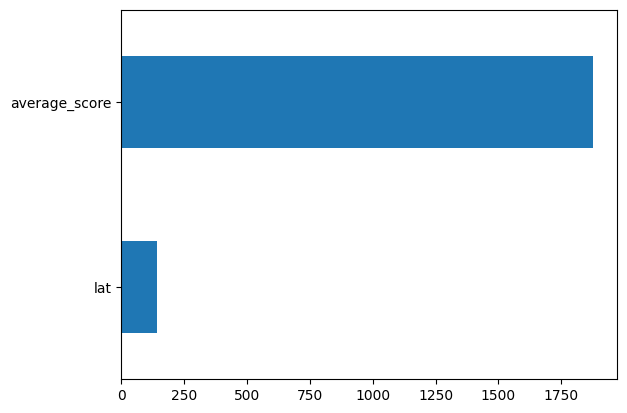

In [213]:
y= y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

По графику важности категориальных признаков мы можем понять, что признак *average_score* важнее, чем *lat*, в определении рейтинга отеля

Добавьте и другие категориальные признаки в список *cat_cols*, чтобы оценить их значимость в определении рейтинга отеля.

Для оценки значимости непрерывных переменных будем использовать функцию *[f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)* из библиотеки *sklearn*. В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (*ANOVA*). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (*2-sample t*).

Метод возвращает двумерный массив f-статистик и *p-value* для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

<AxesSubplot: >

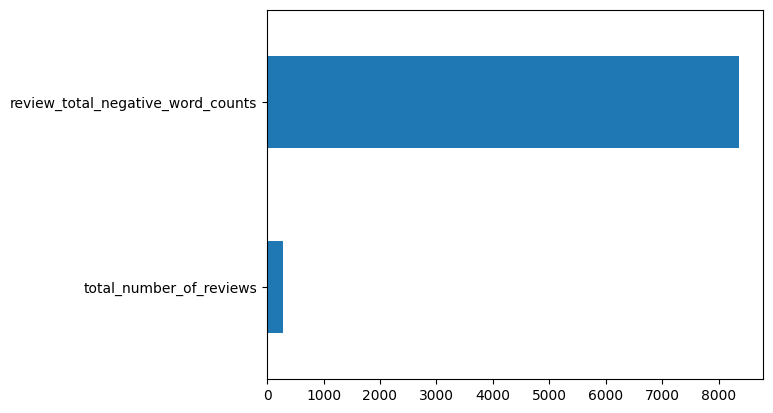

In [214]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

По  графику важности категориальных переменных мы можем понять, что признак review_total_negative_word_counts важнее, чем total_number_of_reviews, в определении рейтинга отеля

Результаты данных тестов вы сможете использовать в своих исследования при отборе признаков: удаляйте менее значимые признаки и сравнивайте результаты качества полученных моделей.

***
→ Тесты *chi2* и *f_classif* можно использовать для выбора *n* заданных признаков с наивысшими значениями статистик с помощью метода **SelectKBest**. Подробнее об этом вы можете прочесть в руководстве [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).
***


Попробуйте применить данные  рекомендации для улучшения качества предсказания. **Оцените, насколько изменилась метрика**.

**Задание 4.2**

Сколько уникальных названий отелей представлено в наборе данных?

In [218]:
hotels_hw['hotel_name'].nunique()
print('Кол-во уникальных названий отелей в наборе данных: ', hotels_hw['hotel_name'].nunique())

Кол-во уникальных названий отелей в наборе данных:  1492


**Задание 4.3**

Ответьте на вопросы о дате размещения отзывов.
* Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
* Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

In [219]:
hotels_hw['review_date'] = pd.to_datetime(hotels_hw['review_date'])

hotels_hw['review_date'].min()
hotels_hw['review_date'].max()

print('Когда был оставлен самый свежий отзыв: ', hotels_hw['review_date'].max())
print('Когда был оставлен самый первый отзыв: ', hotels_hw['review_date'].min())

Когда был оставлен самый свежий отзыв:  2017-08-03 00:00:00
Когда был оставлен самый первый отзыв:  2015-08-04 00:00:00


**Задание 4.4**

Сколько уникальных тегов представлено в наборе данных?

In [220]:
hotels_hw.head()

def collect_tags(df):
    tags_dict = dict()
    tags_list = list()
    for index, row in df['tags'].items():
        tags = list(row.replace("[' ", '').replace(" ']", '').split(" ', ' "))
        tags_list.append(tags)
        for tag in tags:
            if tag not in tags_dict.keys():
                tags_dict.update({tag:1})
            else:
                tags_dict[tag] += 1
    return tags_list, tags_dict

tags_list, tags_dict = collect_tags(hotels_hw)
# print(tags_dict)
# print(tags_list)
print('Кол-во уникальных тэгов: ', len(tags_dict))
print('Кол-во отзывов с тэгами: ', len(tags_list))

Кол-во уникальных тэгов:  2368
Кол-во отзывов с тэгами:  386803


**Задание 4.5**

Какой тег представлен в наибольшем числе отзывов?

In [221]:
max(tags_dict, key=tags_dict.get)

'Leisure trip'

**Задание 4.6**

Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

In [222]:
def most_freq_tag_stayed(tags):
    stayed_dict = dict()
    for key, values in tags.items():
        if 'stayed' in key.lower():
            stayed_dict[key] = values
    max_stayed = max(stayed_dict, key=stayed_dict.get) 
    return max_stayed, tags[max_stayed]

print(most_freq_tag_stayed(tags_dict))

('Stayed 1 night', 145373)
